In [4]:
%load_ext autoreload
import logging as log
import tsplib95
from functools import partial
%autoreload 2
from utils import get_tsp_files_available, find_solution, pivot_and_plot
from cp_SAT import solve_OrTools
from fourmil import ACO
from tqdm import tqdm
import pandas as pd
from TSP_OR import incompletOR



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Approche complète

In [2]:

solvers = {
    "complete" : solve_OrTools,
    "complete_sup" : partial(solve_OrTools, supplementary_constraint = True),
    "complete_enf" : partial(solve_OrTools, enforce= True),
    "complete_sup_enf" : partial(solve_OrTools, supplementary_constraint = True, enforce= True),
}
for problem in get_tsp_files_available("TSP_Instances", 10):
    for i in tqdm(range(20)):
        find_solution(problem, solvers, solution_save_file="test_complet.csv", verbose= False)

100%|██████████| 20/20 [01:20<00:00,  4.02s/it]


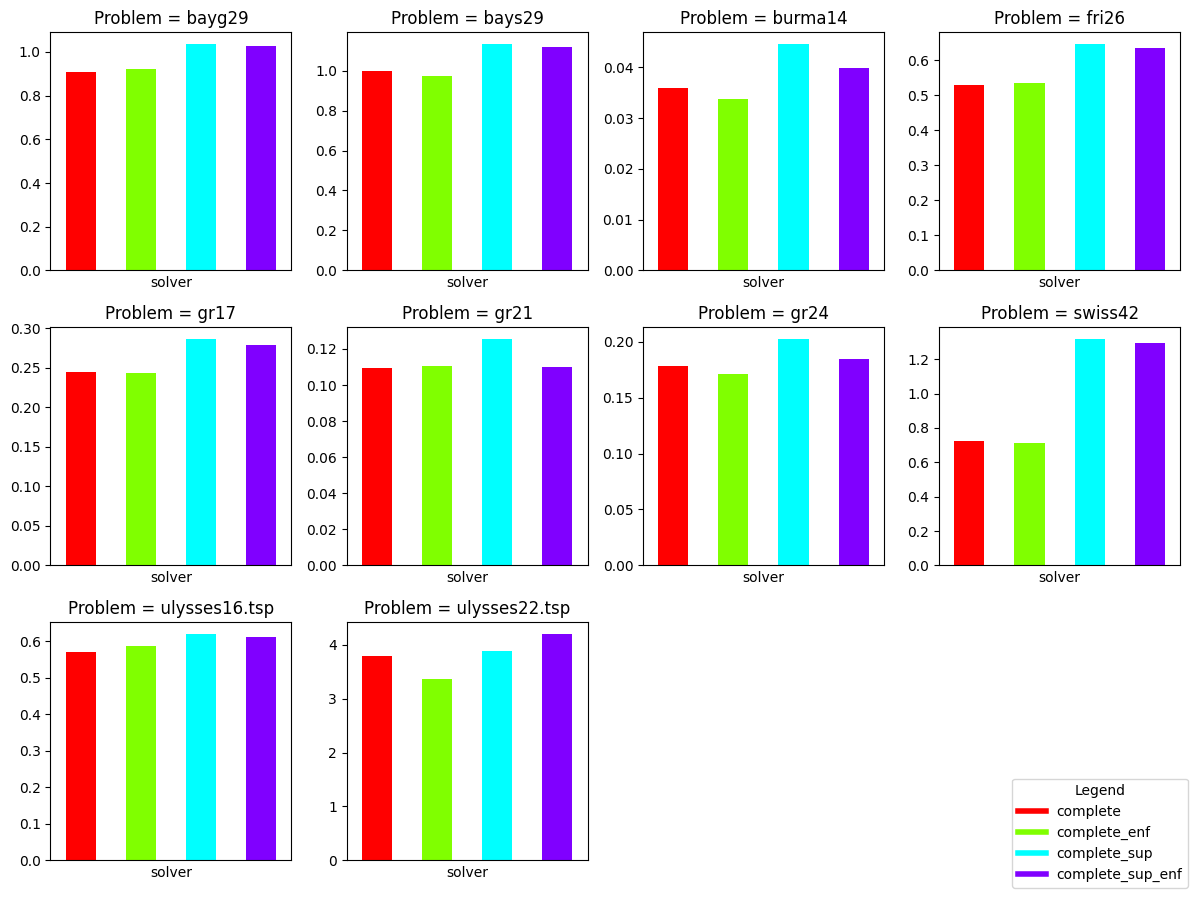

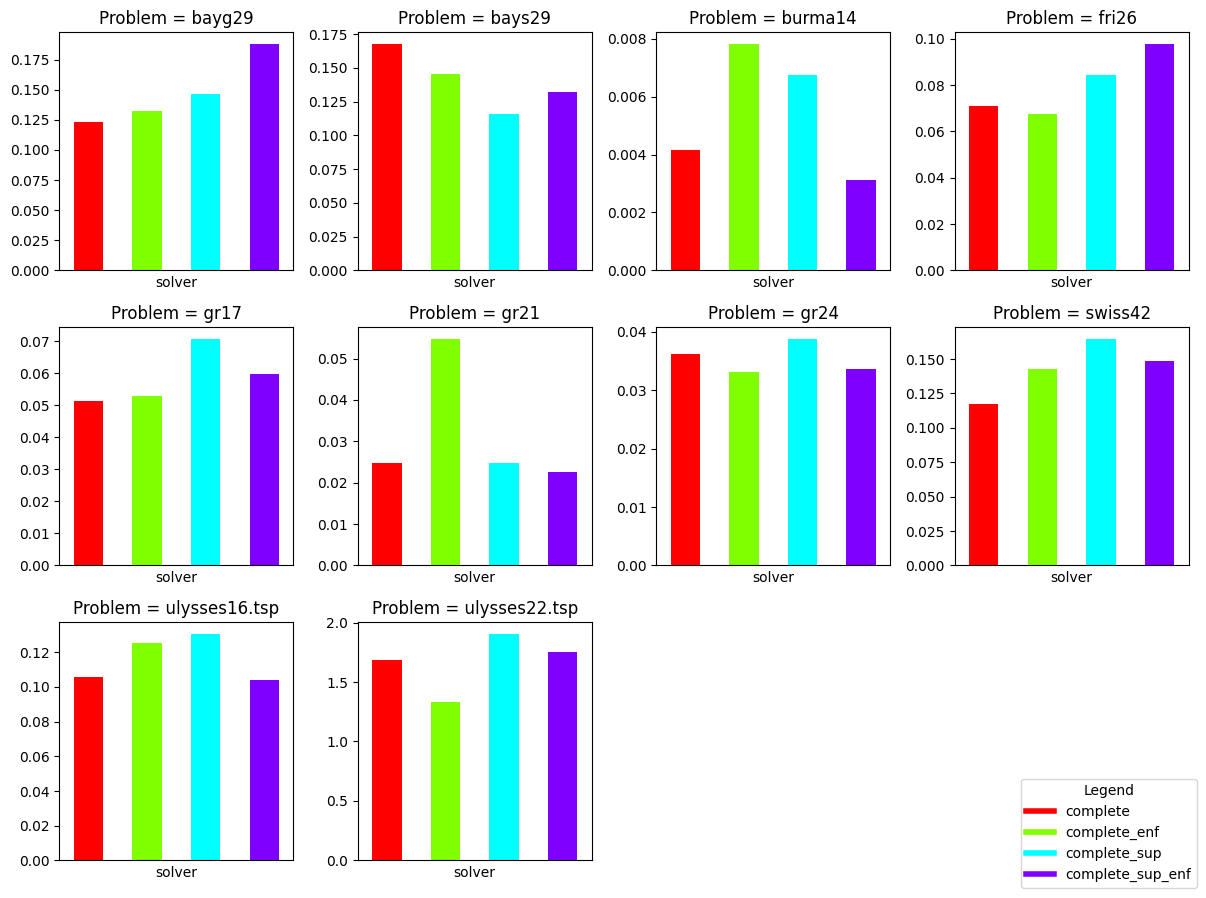

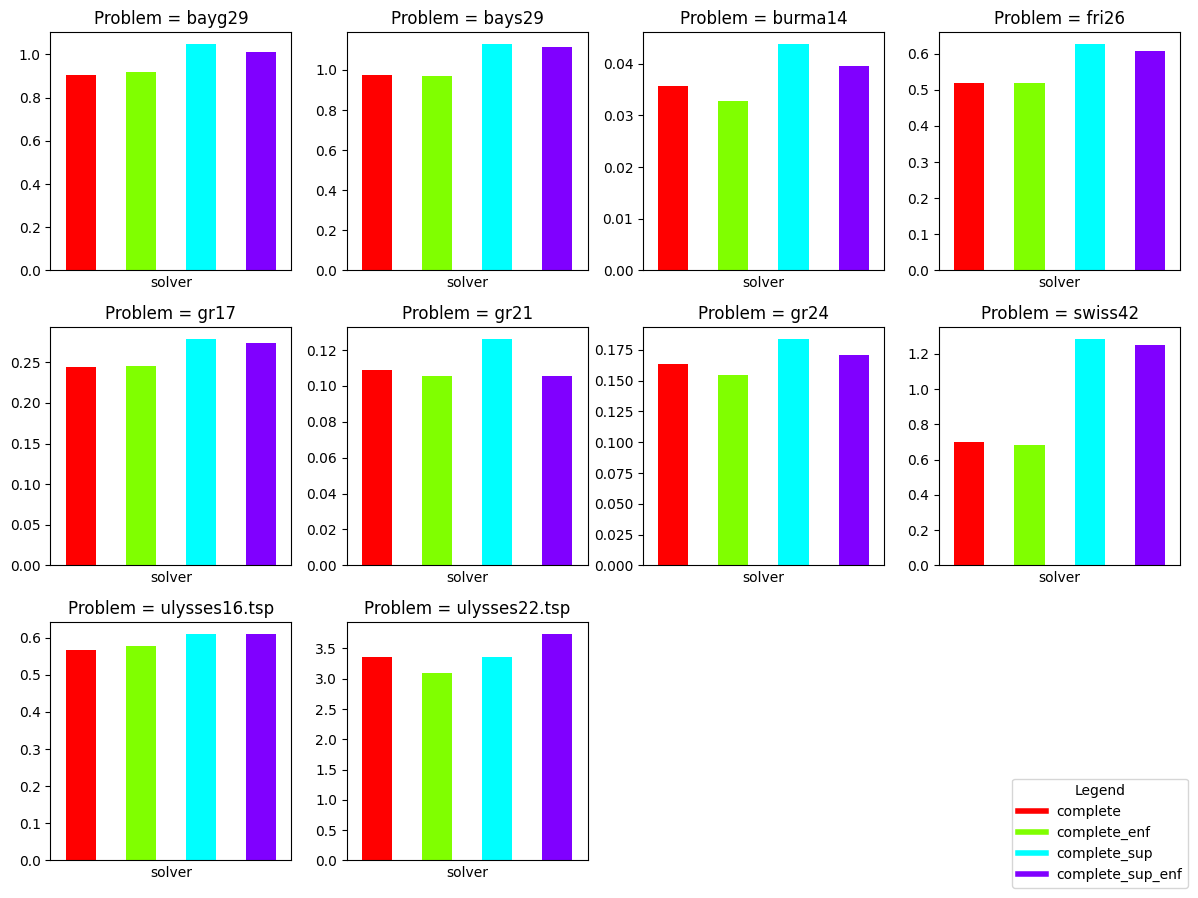

In [84]:
df = pd.read_csv("test_complet.csv").drop("status", axis = 1)
grouped_df =df.groupby(["problem", "solver"])
pivot_and_plot(grouped_df.mean())

# Approche Incomplète

In [6]:
models = {
    "fourmil" : ACO,
    "OR incomplete" : incompletOR
}

for problem in get_tsp_files_available("TSP_Instances", 10):
    for i in tqdm(range(20)):
        find_solution(problem, solvers, solution_save_file="test_incomplet.csv", verbose= False)


 70%|███████   | 14/20 [03:32<01:30, 15.05s/it]

In [ ]:

df = pd.read_csv("test_complet.csv").drop("status", axis = 1)
grouped_df =df.groupby(["problem", "solver"])
pivot_and_plot(grouped_df.mean())
pivot_and_plot(grouped_df.mean(), value='len')